In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [10]:
X_train = X_train/255 #normalisation

In [11]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
X_test = X_test/255

In [13]:
encoder = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(input_shape=[28,28])
                                      #reduce dimension from 784 to 30
                                      tf.keras.layers.Dense(100,activation='selu')
                                      tf.keras.layers.Dense(30,activation='selu')
                                      ])

SyntaxError: ignored

In [ ]:
encoder.summary()

In [ ]:
decoder = tf.keras.models.Sequential([
                                      tf.keras.layers.Dense(28*28, activation='sigmoid'.input_shape=[30])
                                      tf.keras.layers.Reshape(28,28)
                                      ])

In [ ]:
decoder.summary()

In [ ]:
autoencoder = tf.keras.Sequential([encoder,decoder])

In [ ]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.SGD(learning_rate=1.5))

In [ ]:
autoencoder.summary()

In [7]:
history = autoencoder.fit(X_train, X_train, epochs=10, validation_data=[X_test, X_test])

NameError: ignored

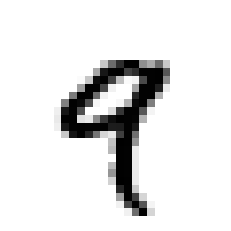

In [16]:
#confront input and output
import matplotlib.pyplot as plt

def plot_image(image):
  plt.imshow(image,cmap='binary')
  plt.axis('off')

plot_image(X_train[4])

In [19]:
def show_reconstruction(model,n_images=5):
  reconstructions = model.predict(X_test[:n_images])
  fig = plt.figure(figsize=(n_images*1.5,3))
  for image_index in range(n_images):
    plt.subplot(2,n_images,1+image_index)
    plot_image(X_test[image_index])
    plt.subplot(2,n_images,1+n_images+image_index)
    plot_image(reconstructions[image_index])

In [20]:
show_reconstruction(autoencoder)

NameError: ignored